<a href="https://colab.research.google.com/github/lucas-fpaiva/AnalisePred_I/blob/main/Projeto/popularity_forro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Avaliar a popularidade de músicas de forro

In [ ]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
import ml_models 


In [ ]:
forroset= pd.read_parquet('https://github.com/lucas-fpaiva/Forroset/blob/main/data/forroset.parq?raw=true', engine='auto')

In [ ]:
forroset.columns

Index(['track_id', 'track', 'artist', 'artist_id', 'popularity', 'album',
       'album_id', 'track_year', 'duration_ms', 'uri', 'preview_url', 'energy',
       'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'loudness', 'valence', 'mode',
       'beats_start', 'beats_duration', 'beats_confidence', 'bars_start',
       'bars_duration', 'bars_confidence', 'tatums_start', 'tatums_duration',
       'tatums_confidence', 'librosa_beats_start', 'librosa_discrepancy',
       'tempo_bins', 'tempo_bins_max', 'genre_filt', 'folds', 'manual_filt',
       'lyrics'],
      dtype='object')

In [ ]:
treino = forroset[forroset.folds>2]
teste = forroset[forroset.folds<3]

In [ ]:
treino.head()

,track_id,track,artist,artist_id,popularity,album,album_id,track_year,duration_ms,uri,...,tatums_duration,tatums_confidence,librosa_beats_start,librosa_discrepancy,tempo_bins,tempo_bins_max,genre_filt,folds,manual_filt,lyrics
0,3uCg5JVHl2E6i8gFJxUjsp,Xote Dos Milagres,Falamansa,6uTK3YD9CT3pLx2yEfVmXk,62,Deixa Entrar...,0TtLYG5fkX55XnbHQkGvaf,2000,266440,spotify:track:3uCg5JVHl2E6i8gFJxUjsp,...,"[0.34802, 0.34802, 0.35964, 0.35964, 0.36522, ...","[0.974, 0.974, 0.537, 0.537, 0.424, 0.424, 0.4...","[0.20898, 0.97524, 1.71828, 2.50776, 3.22757, ...",0.00406,[60_81),81,1.1,12,1.0,None
1,3QQhhSRe31x9qs1NqlOuOS,Xote da Alegria,Falamansa,6uTK3YD9CT3pLx2yEfVmXk,59,Essa É Pra Vocês,03pJz5LVFVNSGNHBVREUL0,2001,253733,spotify:track:3QQhhSRe31x9qs1NqlOuOS,...,"[0.39987, 0.39987, 0.38104, 0.38104, 0.37319, ...","[0.725, 0.725, 0.861, 0.861, 0.933, 0.933, 0.9...","[0.5805, 1.32354, 2.06658, 2.83283, 3.57587, 4...",0.00034,[60_81),81,1.1,13,1.0,"[Xote da Alegria, Falamansa, Se um dia alguém ..."
3,2oFutWuJCmhePvCTlrpqLc,A Vida do Viajante (feat. Gonzaguinha),Luiz Gonzaga,2ZofT7n9AlTKf7KDCoHGgD,51,Baião de Dois,4V6Ro3hUyNnfhukw59Fy26,2012,227440,spotify:track:2oFutWuJCmhePvCTlrpqLc,...,"[0.397, 0.397, 0.39242, 0.39242, 0.39057, 0.39...","[0.978, 0.978, 0.729, 0.729, 0.592, 0.592, 0.5...","[1.06812, 1.83438, 2.46132, 3.15791, 3.83129, ...",0.01416,[60_81),81,1.1,8,1.0,"[A Vida do Viajante, Luiz Gonzaga, Minha vida ..."
4,2rw8Sij3CGRzp4KL720y48,Medo de Escuro,Falamansa,6uTK3YD9CT3pLx2yEfVmXk,44,Deixa Entrar...,0TtLYG5fkX55XnbHQkGvaf,2000,211640,spotify:track:2rw8Sij3CGRzp4KL720y48,...,"[0.39948, 0.39948, 0.39115, 0.39115, 0.3915, 0...","[0.977, 0.977, 0.0, 0.0, 0.847, 0.847, 0.854, ...","[0.51084, 1.30032, 2.11302, 2.87927, 3.52943, ...",0.01238,[60_81),81,1.1,15,1.0,"[Medo de Escuro, Falamansa, Tem dias que a gen..."
5,1lDcR8fzWif3m5beXftePz,Solução (Essa É Pra Vocês),Falamansa,6uTK3YD9CT3pLx2yEfVmXk,40,Essa É Pra Vocês,03pJz5LVFVNSGNHBVREUL0,2001,227000,spotify:track:1lDcR8fzWif3m5beXftePz,...,"[0.37485, 0.37485, 0.36516, 0.36516, 0.36501, ...","[0.36, 0.36, 0.213, 0.213, 0.099, 0.099, 0.358...","[0.20898, 0.97524, 1.69506, 2.46132, 3.20435, ...",0.00024,[60_81),81,1.1,6,1.0,"[Solução, Falamansa, Eu nem dormi direito\nIss..."


In [ ]:
x_treino = treino[['energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'loudness', 'valence', 'mode']]
y_treino = treino.popularity

x_teste = teste[['energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'loudness', 'valence', 'mode']]
y_teste = teste.popularity

In [ ]:
x_treino.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,loudness,valence,mode
count,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000
mean,0.713054,0.255732,120.394858,0.052712,0.380885,0.034198,3.979430,0.648784,5.062500,-7.802556,0.858820,0.702532
std,0.153377,0.206217,29.769396,0.035395,0.236159,0.148425,0.189693,0.109342,3.283114,2.606776,0.149561,0.457235
min,0.000125,0.022600,60.111000,0.023400,0.000033,0.000000,1.000000,0.197000,0.000000,-22.760000,0.047400,0.000000
25%,0.608000,0.106000,98.013250,0.036600,0.184750,0.000000,4.000000,0.585000,2.000000,-9.237000,0.806750,0.000000
50%,0.727000,0.198000,109.916000,0.042700,0.348000,0.000000,4.000000,0.657000,5.000000,-7.538000,0.915000,1.000000
75%,0.833000,0.329000,146.082750,0.054700,0.566250,0.000024,4.000000,0.720250,7.000000,-5.944750,0.964000,1.000000
max,0.988000,0.990000,212.538000,0.475000,0.995000,0.980000,5.000000,0.975000,11.000000,-1.554000,0.996000,1.000000


In [ ]:
from random import random, seed
from sklearn.model_selection import cross_val_score
param = [[15],1,'squared_error']
model=  ml_models.ml_models("DT",names=True,parameters=param,task="R")
print(model)
scores = cross_val_score(model, x_treino, y_treino, cv=5, scoring='neg_mean_absolute_percentage_error')
print(np.mean(scores))

KNN: KNeighborsRegressor
LM: LinearRegression
DT: DecisionTreeRegressor
RF: RandomForestRegressor 
GB: GradientBoostingRegressor
SVM: SVR
ADA: AdaBoostRegressor
MLP: MLPRegressor
DecisionTreeRegressor(max_depth=15, random_state=0)
[-2.25179981e+15 -2.42145829e+16 -8.76120373e+15 -7.81213397e+15
 -1.83697981e+16]


In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Separação treino teste

### Treino do modelo

In [ ]:
model = ml(random_state=0, max_depth=25)
model.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=25, random_state=0)

In [ ]:
np.sqrt(model.score(x_treino, y_treino))

0.9986360167185495

In [ ]:
model.score(x_teste, y_teste)

-0.8872291033250592

In [ ]:
y_pred_t = model.predict(x_treino)

In [ ]:
y_pred= model.predict(x_teste)

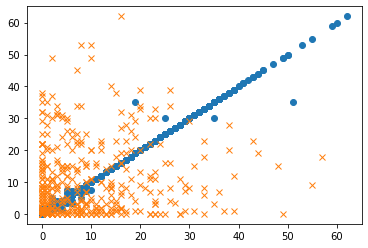

In [ ]:
plt.plot(y_treino, y_pred_t, 'o')

plt.plot(y_teste, y_pred, 'x')


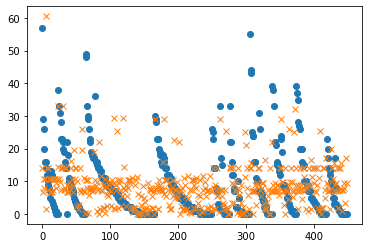

In [ ]:
plt.plot(y_teste.values, 'o')
plt.plot(y_pred, 'x')

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true+0.00001))) * 100

In [ ]:
def mae (y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
def r2_score(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

0.24169303797468356